In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Replacing all null with 0**

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

In [7]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
 df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2285.169963
std,0.368612,24.559481,30.090047,2267.544511
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.675000
50%,0.000000,29.000000,70.350000,1398.250000
75%,0.000000,55.000000,89.850000,3803.050000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

0

# converting 1 0 with yes no

In [19]:
def con(value):
  if value==1:
    return "yes"
  else:
    return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(con)

In [22]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


[Text(0, 0, '5174'), Text(0, 0, '1869')]

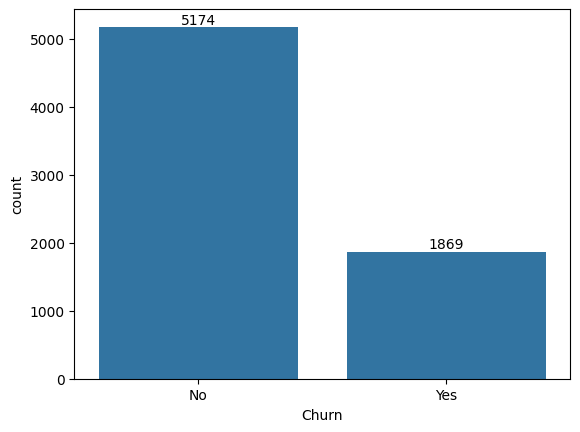

In [26]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])

In [27]:
gb=df.groupby("Churn").agg({"Churn":"count"})

In [28]:
gb

,Churn
Churn,
No,5174
Yes,1869


([<matplotlib.patches.Wedge at 0x7de16a598950>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.46%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.54%')])

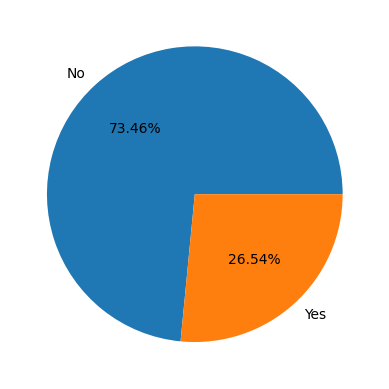

In [47]:
plt.pie(gb["Churn"],labels=gb.index,autopct='%1.2f%%')

# How gender is affecting the result

Text(0.5, 1.0, 'Churn result using gender')

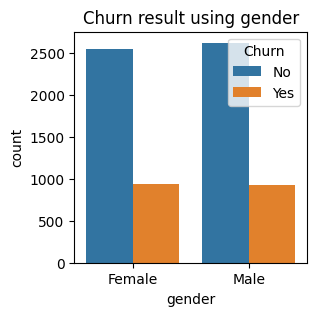

In [52]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title('Churn result using gender')

Text(0.5, 1.0, 'Churn result using SeniorCitizen')

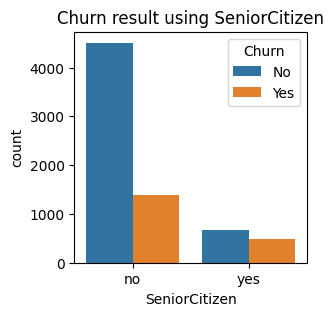

In [53]:
plt.figure(figsize=(3,3))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title('Churn result using SeniorCitizen')

# greater percentage of senior citezen has churned

(0.0, 100.0)

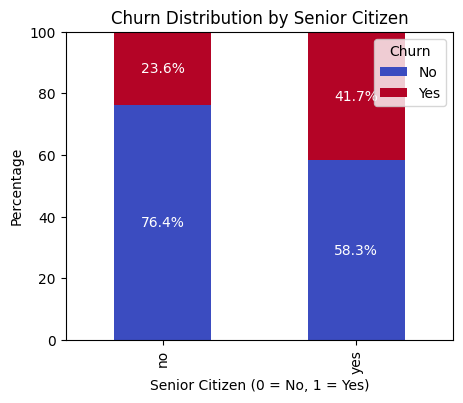

In [54]:
senior_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn_percent = senior_churn_counts.div(senior_churn_counts.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
ax = senior_churn_percent.plot(kind='bar', stacked=True, figsize=(5, 4), colormap='coolwarm')

# Add percentage labels
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.1f%%', label_type='center', color='white', fontsize=10)

# Customize plot
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.title('Churn Distribution by Senior Citizen')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 100)

<Axes: xlabel='tenure', ylabel='Count'>

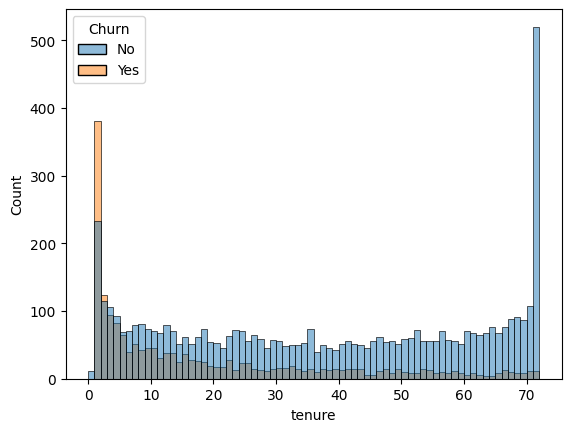

In [57]:
 sns.histplot(x='tenure',data=df,hue='Churn',bins=72)

# peaple who have taken our services for long time they stayed with us.And who used for short time like one or two months they have churned

Text(0.5, 1.0, 'Churn result using Contract')

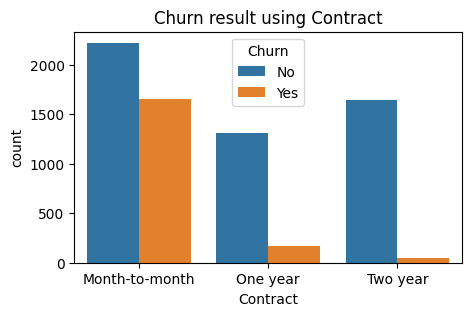

In [59]:
 plt.figure(figsize=(5,3))
sns.countplot(x='Contract',data=df,hue='Churn')
plt.title('Churn result using Contract')

# peaple who have month to month contract they have churned a lot more that who have contract for one or two years

In [61]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

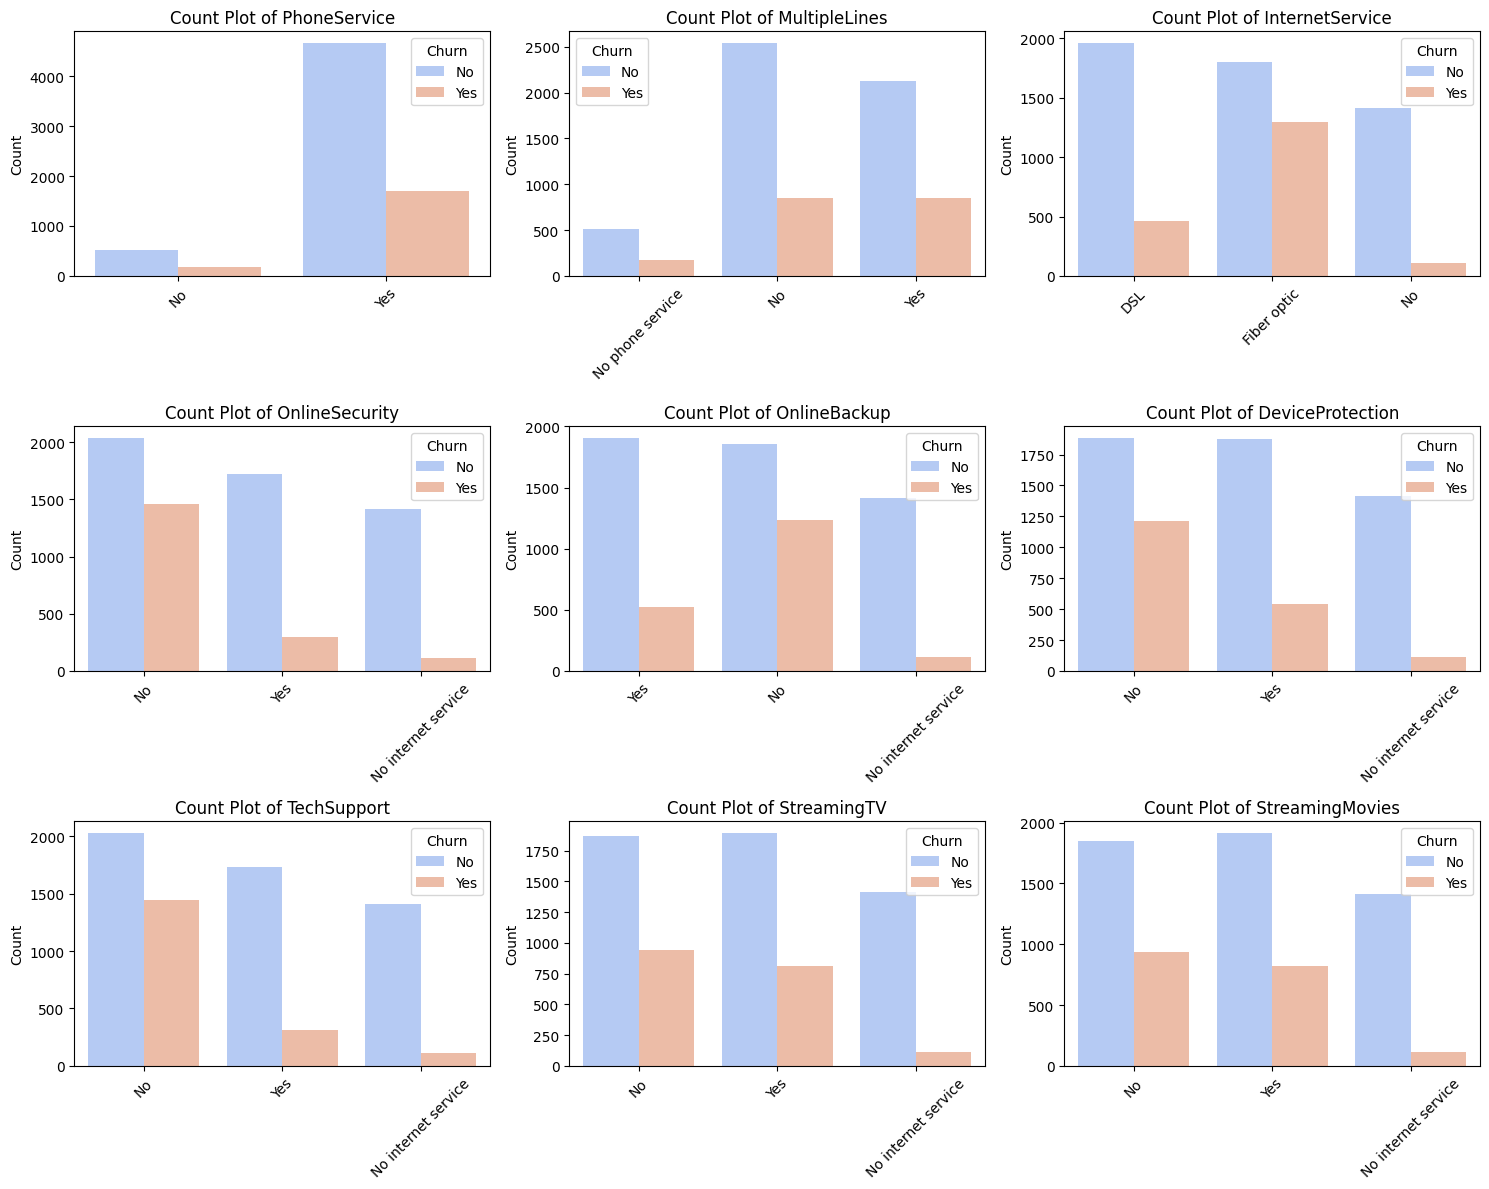

In [63]:
# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure size and layout
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

# Loop through each column and plot on respective subplot
for col, ax in zip(cols, axes.flatten()):
    sns.countplot(x=df[col], ax=ax, palette='coolwarm',hue=df["Churn"])
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Adjust layout
plt.tight_layout()

# Customers with fiber optic internet and no security features (OnlineSecurity, TechSupport, etc.) have a higher churn rate. Those with basic phone services and DSL internet tend to stay longer.

Text(0.5, 1.0, 'Churn result using payment method')

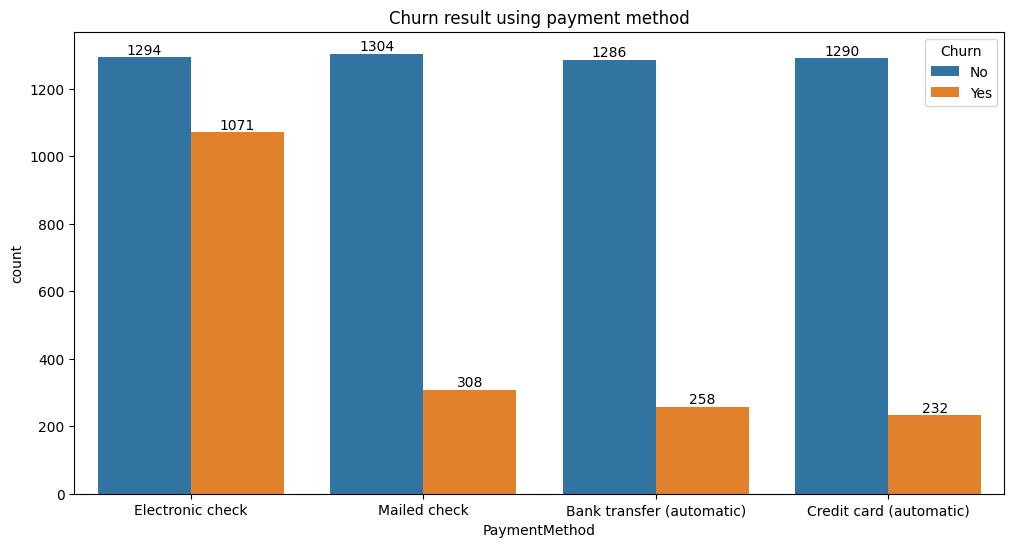

In [71]:
  plt.figure(figsize=(12,6))
ax=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn result using payment method')

# people are churning more whenever its electronic check